In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data 

In [2]:
df = pd.read_csv('final_process-merge-data.csv')
df.head()

,Unnamed: 0,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,...,yesterday,young,zealand,Price,year,month,day,dayofyear,is_month_end,is_month_start
0,0,2021-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.316228,0.0,NaN,2021,7,3,184,False,False
1,1,2021-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,783.30",2021,7,2,183,False,False
2,2,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,776.80",2021,7,1,182,False,True
3,3,2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,771.60",2021,6,30,181,True,False
4,4,2021-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,763.60",2021,6,29,180,False,False


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,yesterday,young,zealand,Price,year,month,day,dayofyear,is_month_end,is_month_start
0,2021-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.316228,0.0,NaN,2021,7,3,184,False,False
1,2021-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,783.30",2021,7,2,183,False,False
2,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,776.80",2021,7,1,182,False,True
3,2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,771.60",2021,6,30,181,True,False
4,2021-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,"1,763.60",2021,6,29,180,False,False


# Drop NANs

In [5]:
df = df.dropna()
df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,yesterday,young,zealand,Price,year,month,day,dayofyear,is_month_end,is_month_start
1,2021-07-02,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,"1,783.30",2021,7,2,183,False,False
2,2021-07-01,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,"1,776.80",2021,7,1,182,False,True
3,2021-06-30,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,"1,771.60",2021,6,30,181,True,False
4,2021-06-29,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,"1,763.60",2021,6,29,180,False,False
5,2021-06-28,0.0,0.408248,0.0,0.0,0.0,0.0,0.408248,0.0,0.0,...,0.0,0.0,0.0,"1,780.70",2021,6,28,179,False,False


In [6]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 183
Columns: 628 entries, Date to is_month_start
dtypes: bool(2), float64(620), int64(5), object(1)
memory usage: 651.8+ KB


# Drop Year Column since it is fix

In [11]:
df.drop('year',axis=1,inplace=True)

In [12]:
df.head()

,Date,accumulate,accumulation,act,action,acwi,add,address,adjust,admit,...,xbox,yesterday,young,zealand,Price,month,day,dayofyear,is_month_end,is_month_start
1,2021-07-02,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1783.3,7,2,183,False,False
2,2021-07-01,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1776.8,7,1,182,False,True
3,2021-06-30,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1771.6,6,30,181,True,False
4,2021-06-29,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1763.6,6,29,180,False,False
5,2021-06-28,0.0,0.408248,0.0,0.0,0.0,0.0,0.408248,0.0,0.0,...,0.0,0.0,0.0,0.0,1780.7,6,28,179,False,False


# Separate categorical from continuous columns

In [13]:
df.columns

Index(['Date', 'accumulate', 'accumulation', 'act', 'action', 'acwi', 'add',
       'address', 'adjust', 'admit',
       ...
       'xbox', 'yesterday', 'young', 'zealand', 'Price', 'month', 'day',
       'dayofyear', 'is_month_end', 'is_month_start'],
      dtype='object', length=627)

In [31]:
cat_cols = ['day','month', 'is_month_start', 'is_month_end']
y_col = ['Price']  # this column contains the labels

In [32]:
cont_cols = [col for col in df.columns if col not in cat_cols + y_col+['Date']]

In [33]:
#cont_cols 

# Categorify

In [19]:
# Convert our four categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [20]:
df.dtypes

Date                object
accumulate         float64
accumulation       float64
act                float64
action             float64
                    ...   
month             category
day               category
dayofyear            int64
is_month_end      category
is_month_start    category
Length: 627, dtype: object

In [21]:
df['month'].head()

1    7
2    7
3    6
4    6
5    6
Name: month, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [22]:
df['day'].head()

1     2
2     1
3    30
4    29
5    28
Name: day, dtype: category
Categories (31, int64): [1, 2, 3, 4, ..., 28, 29, 30, 31]

In [23]:
df['is_month_end'].head()

1    False
2    False
3     True
4    False
5    False
Name: is_month_end, dtype: category
Categories (2, object): [False, True]

In [24]:
df['is_month_start'].head()

1    False
2     True
3    False
4    False
5    False
Name: is_month_start, dtype: category
Categories (2, object): [False, True]

In [25]:
df['day'].cat.categories

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [28]:
df['day'].cat.codes.values

array([ 1,  0, 29, 28, 27, 24, 23, 22, 21, 20, 17, 16, 15, 14, 13, 10,  9,
        8,  7,  6,  3,  2,  1,  0, 30, 29, 27, 26, 25, 24, 23, 20, 19, 18,
       17, 16, 13, 12, 11, 10,  9,  6,  5,  4,  3,  2, 29, 28, 27, 26, 25,
       22, 21, 20, 19, 18, 15, 14, 13, 12, 11,  8,  7,  6,  5,  4,  0, 30,
       29, 28, 25, 24, 23, 22, 21, 18, 17, 16, 15, 14, 11, 10,  9,  8,  7,
        4,  3,  2,  1,  0, 25, 24, 23, 22, 21, 18, 17, 16, 15, 14, 13, 11,
       10,  9,  8,  7,  4,  3,  2,  1,  0, 28, 27, 26, 25, 24, 21, 20, 19,
       18, 17, 16, 14, 13, 12, 11, 10,  7,  6,  5,  4,  3,  0], dtype=int8)

In [37]:
day = df['day'].cat.codes.values
month = df['month'].cat.codes.values
m_end = df['is_month_end'].cat.codes.values
m_start = df['is_month_start'].cat.codes.values

cats = np.stack([day, month, m_start,m_end], 1)

cats[:5]


array([[ 1,  6,  0,  0],
       [ 0,  6,  1,  0],
       [29,  5,  0,  1],
       [28,  5,  0,  0],
       [27,  5,  0,  0]], dtype=int8)

In [45]:
# Or in one line of code
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)
cats[:5]

array([[ 1,  6,  0,  0],
       [ 0,  6,  1,  0],
       [29,  5,  0,  1],
       [28,  5,  0,  0],
       [27,  5,  0,  0]], dtype=int8)

In [48]:
cats.dtype

dtype('int8')

In [50]:
cats = cats.astype('int32')
cats[:5]

array([[ 1,  6,  0,  0],
       [ 0,  6,  1,  0],
       [29,  5,  0,  1],
       [28,  5,  0,  0],
       [27,  5,  0,  0]])

# Convert numpy arrays to tensors

In [51]:
# Convert categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64) 


cats[:5]

tensor([[ 1,  6,  0,  0],
        [ 0,  6,  1,  0],
        [29,  5,  0,  1],
        [28,  5,  0,  0],
        [27,  5,  0,  0]])

In [44]:
# Convert continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000, 183.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000, 182.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000, 181.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000, 180.0000],
        [  0.0000,   0.4082,   0.0000,  ...,   0.0000,   0.0000, 179.0000]])

In [52]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

y[:5]

tensor([[1783.3000],
        [1776.8000],
        [1771.6000],
        [1763.6000],
        [1780.7000]])

In [53]:
cats.shape

torch.Size([133, 4])

In [54]:
conts.shape

torch.Size([133, 621])

In [55]:
y.shape

torch.Size([133, 1])

# Set an embedding size

In [56]:
# This will set embedding sizes for categorical variables
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(31, 16), (7, 4), (2, 1), (2, 1)]

# Define a TabularModel

In [57]:
# This is our source data
catz = cats[:4]
catz

tensor([[ 1,  6,  0,  0],
        [ 0,  6,  1,  0],
        [29,  5,  0,  1],
        [28,  5,  0,  0]])

In [58]:
# This is passed in when the model is instantiated
emb_szs

[(31, 16), (7, 4), (2, 1), (2, 1)]

In [59]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(31, 16)
  (1): Embedding(7, 4)
  (2): Embedding(2, 1)
  (3): Embedding(2, 1)
)

In [60]:
list(enumerate(selfembeds))

[(0, Embedding(31, 16)),
 (1, Embedding(7, 4)),
 (2, Embedding(2, 1)),
 (3, Embedding(2, 1))]

In [61]:
# This happens inside the forward() method
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[ 0.4130, -0.9648, -1.5140, -0.7966, -1.3037, -0.5035, -0.3979,  0.4411,
           0.6476, -0.3957, -0.1532,  0.6746, -1.9132, -1.5161, -1.0182, -0.2471],
         [-2.0103,  1.5139, -0.9502,  1.1905,  2.3837, -0.6534,  1.8693, -0.6700,
          -0.7442, -1.6495, -2.4100, -0.3593,  0.3400, -0.5272,  1.5866,  0.5682],
         [-0.5158,  0.3274,  0.1366,  1.4445, -0.4759,  2.0416, -1.7239, -0.1337,
           0.6362, -0.4606,  1.2907, -0.6875,  0.2110,  0.0522,  0.0099,  0.5343],
         [-1.2217, -0.3834, -0.6039, -0.5562,  0.4417,  1.1865,  0.8354,  0.4736,
          -0.2570, -0.9893,  2.3451, -0.8578,  0.8087, -0.6549,  1.1674,  0.4675]],
        grad_fn=<EmbeddingBackward>),
 tensor([[ 0.2093, -0.6206, -0.5751,  0.5055],
         [ 0.2093, -0.6206, -0.5751,  0.5055],
         [ 0.7779,  0.2944,  1.1667, -0.4073],
         [ 0.7779,  0.2944,  1.1667, -0.4073]], grad_fn=<EmbeddingBackward>),
 tensor([[ 1.2057],
         [-0.2060],
         [ 1.2057],
         [ 1.2057]], g

In [62]:
# We concatenate the embedding sections (16,4,1,1) into one (22)
z = torch.cat(embeddingz, 1)
z

tensor([[ 0.4130, -0.9648, -1.5140, -0.7966, -1.3037, -0.5035, -0.3979,  0.4411,
          0.6476, -0.3957, -0.1532,  0.6746, -1.9132, -1.5161, -1.0182, -0.2471,
          0.2093, -0.6206, -0.5751,  0.5055,  1.2057,  0.2251],
        [-2.0103,  1.5139, -0.9502,  1.1905,  2.3837, -0.6534,  1.8693, -0.6700,
         -0.7442, -1.6495, -2.4100, -0.3593,  0.3400, -0.5272,  1.5866,  0.5682,
          0.2093, -0.6206, -0.5751,  0.5055, -0.2060,  0.2251],
        [-0.5158,  0.3274,  0.1366,  1.4445, -0.4759,  2.0416, -1.7239, -0.1337,
          0.6362, -0.4606,  1.2907, -0.6875,  0.2110,  0.0522,  0.0099,  0.5343,
          0.7779,  0.2944,  1.1667, -0.4073,  1.2057,  0.5543],
        [-1.2217, -0.3834, -0.6039, -0.5562,  0.4417,  1.1865,  0.8354,  0.4736,
         -0.2570, -0.9893,  2.3451, -0.8578,  0.8087, -0.6549,  1.1674,  0.4675,
          0.7779,  0.2944,  1.1667, -0.4073,  1.2057,  0.2251]],
       grad_fn=<CatBackward>)

In [63]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(.4)

In [64]:
z = selfembdrop(z)
z

tensor([[ 0.0000, -0.0000, -2.5233, -1.3276, -2.1728, -0.8392, -0.6632,  0.7352,
          1.0793, -0.0000, -0.2553,  1.1244, -3.1886, -2.5269, -1.6971, -0.0000,
          0.0000, -0.0000, -0.9585,  0.8426,  0.0000,  0.3751],
        [-3.3505,  2.5231, -0.0000,  1.9841,  0.0000, -1.0891,  3.1155, -1.1167,
         -1.2404, -2.7492, -0.0000, -0.5989,  0.0000, -0.8787,  0.0000,  0.0000,
          0.3489, -1.0344, -0.9585,  0.8426, -0.0000,  0.3751],
        [-0.8597,  0.0000,  0.2277,  2.4074, -0.0000,  3.4026, -0.0000, -0.2229,
          0.0000, -0.7676,  2.1512, -1.1459,  0.3516,  0.0871,  0.0165,  0.0000,
          1.2965,  0.4906,  1.9445, -0.6788,  2.0095,  0.9238],
        [-2.0362, -0.0000, -1.0065, -0.9269,  0.7362,  0.0000,  1.3923,  0.0000,
         -0.4283, -0.0000,  3.9085, -0.0000,  1.3478, -0.0000,  0.0000,  0.7792,
          1.2965,  0.4906,  0.0000, -0.0000,  2.0095,  0.3751]],
       grad_fn=<MulBackward0>)

In [117]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [118]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [300,200], p=0.4)

In [119]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(31, 16)
    (1): Embedding(7, 4)
    (2): Embedding(2, 1)
    (3): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(621, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=643, out_features=300, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=200, out_features=1, bias=True)
  )
)

# Define loss function & optimizer

In [120]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Perform train/test splits

In [124]:
batch_size = 100
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [125]:
len(cat_train)

80

In [126]:
len(cat_test)

20

# Train the model

In [127]:
import time
start_time = time.time()

epochs = 3000
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%5 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 1805.07336426
epoch:   6  loss: 1805.07019043
epoch:  11  loss: 1804.99182129
epoch:  16  loss: 1804.98168945
epoch:  21  loss: 1804.90478516
epoch:  26  loss: 1804.88854980
epoch:  31  loss: 1804.77673340
epoch:  36  loss: 1804.73852539
epoch:  41  loss: 1804.58605957
epoch:  46  loss: 1804.54699707
epoch:  51  loss: 1804.41662598
epoch:  56  loss: 1804.24902344
epoch:  61  loss: 1804.15405273
epoch:  66  loss: 1803.87255859
epoch:  71  loss: 1803.79333496
epoch:  76  loss: 1803.54455566
epoch:  81  loss: 1803.37402344
epoch:  86  loss: 1803.01538086
epoch:  91  loss: 1802.79443359
epoch:  96  loss: 1802.43457031
epoch: 101  loss: 1802.03747559
epoch: 106  loss: 1801.72900391
epoch: 111  loss: 1801.09643555
epoch: 116  loss: 1800.86169434
epoch: 121  loss: 1800.32849121
epoch: 126  loss: 1799.86389160
epoch: 131  loss: 1799.32775879
epoch: 136  loss: 1799.05969238
epoch: 141  loss: 1798.40344238
epoch: 146  loss: 1797.72192383
epoch: 151  loss: 1796.93530273
epoch: 1

epoch: 1276  loss: 1020.70794678
epoch: 1281  loss: 1022.41998291
epoch: 1286  loss: 1007.60980225
epoch: 1291  loss: 998.63140869
epoch: 1296  loss: 1004.06713867
epoch: 1301  loss: 981.05682373
epoch: 1306  loss: 987.57873535
epoch: 1311  loss: 982.59368896
epoch: 1316  loss: 982.01800537
epoch: 1321  loss: 967.41699219
epoch: 1326  loss: 970.57299805
epoch: 1331  loss: 955.44506836
epoch: 1336  loss: 944.76074219
epoch: 1341  loss: 951.91412354
epoch: 1346  loss: 938.89410400
epoch: 1351  loss: 929.28570557
epoch: 1356  loss: 926.22308350
epoch: 1361  loss: 928.95812988
epoch: 1366  loss: 923.96325684
epoch: 1371  loss: 902.97796631
epoch: 1376  loss: 901.41229248
epoch: 1381  loss: 900.42523193
epoch: 1386  loss: 892.54302979
epoch: 1391  loss: 886.33581543
epoch: 1396  loss: 887.13928223
epoch: 1401  loss: 881.47308350
epoch: 1406  loss: 871.69244385
epoch: 1411  loss: 860.36535645
epoch: 1416  loss: 844.85888672
epoch: 1421  loss: 840.68829346
epoch: 1426  loss: 845.81219482
epoc

epoch: 2566  loss: 118.47858429
epoch: 2571  loss: 106.05198669
epoch: 2576  loss: 101.28065491
epoch: 2581  loss: 115.60653687
epoch: 2586  loss: 85.63512421
epoch: 2591  loss: 98.98529053
epoch: 2596  loss: 103.98904419
epoch: 2601  loss: 117.14859772
epoch: 2606  loss: 108.83284760
epoch: 2611  loss: 94.16059875
epoch: 2616  loss: 103.20400238
epoch: 2621  loss: 99.68976593
epoch: 2626  loss: 119.56712341
epoch: 2631  loss: 113.88819122
epoch: 2636  loss: 95.54782104
epoch: 2641  loss: 122.82216644
epoch: 2646  loss: 116.85504150
epoch: 2651  loss: 101.98213959
epoch: 2656  loss: 115.75311279
epoch: 2661  loss: 98.70677185
epoch: 2666  loss: 118.72725677
epoch: 2671  loss: 95.64060974
epoch: 2676  loss: 100.29425049
epoch: 2681  loss: 107.53242493
epoch: 2686  loss: 123.69490051
epoch: 2691  loss: 97.82137299
epoch: 2696  loss: 110.21655273
epoch: 2701  loss: 100.42783356
epoch: 2706  loss: 114.52444458
epoch: 2711  loss: 107.58152008
epoch: 2716  loss: 104.40861511
epoch: 2721  los

# Plot the loss function

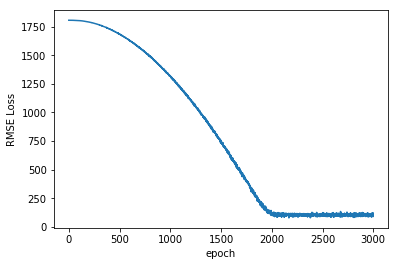

In [128]:
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

# Validate the model

In [129]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 125.66398621


In [130]:
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(6):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1. 1816.7661 1724.3000  92.4661
 2. 1797.4097 1727.2000  70.2097
 3. 1759.0933 1726.5000  32.5933
 4. 1692.4919 1721.9000  29.4081
 5. 1894.3032 1682.9000 211.4032
 6. 1926.0127 1703.8000 222.2126
